In [1]:
import os

# Set current working directory to parent folder
os.chdir(os.path.abspath(".."))

In [2]:
import time
import pickle
import pandas as pd
import numpy as np

import keras
from keras.models import load_model

import librosa
import librosa.display

In [3]:
df_annotations = pd.read_excel(f'./data/annotations_2.xlsx')

In [4]:
# Viendo el archivo partitions.txt se que el conversation 47 es test
df_annotations[df_annotations['Name'].str.slice(0,21) == 'MSP-Conversation_0047']

,Name,Emotion,Annotator,PC_Num,Part_Num,start_time,end_time,Audio_Name,Type
105,MSP-Conversation_0047_1_005.csv,Valence,5,47,1,0.0000,332.8091,MSP-Conversation_0047.wav,Test
106,MSP-Conversation_0047_1_006.csv,Valence,6,47,1,0.0000,332.8091,MSP-Conversation_0047.wav,Test
107,MSP-Conversation_0047_1_007.csv,Valence,7,47,1,0.0000,332.8091,MSP-Conversation_0047.wav,Test
108,MSP-Conversation_0047_1_008.csv,Valence,8,47,1,0.0000,332.8091,MSP-Conversation_0047.wav,Test
109,MSP-Conversation_0047_1_009.csv,Valence,9,47,1,0.0000,332.8091,MSP-Conversation_0047.wav,Test
110,MSP-Conversation_0047_1_013.csv,Valence,13,47,1,0.0000,332.8091,MSP-Conversation_0047.wav,Test
111,MSP-Conversation_0047_2_002.csv,Valence,2,47,2,332.8091,617.1787,MSP-Conversation_0047.wav,Test
112,MSP-Conversation_0047_2_005.csv,Valence,5,47,2,332.8091,617.1787,MSP-Conversation_0047.wav,Test
113,MSP-Conversation_0047_2_006.csv,Valence,6,47,2,332.8091,617.1787,MSP-Conversation_0047.wav,Test
114,MSP-Conversation_0047_2_007.csv,Valence,7,47,2,332.8091,617.1787,MSP-Conversation_0047.wav,Test


In [5]:
PC_Num, Part_Num = 47, 1

## Obtain input data

In [6]:
from src.dataload import load_audio_data

data, stamp, sr = load_audio_data(df_annotations, PC_Num, Part_Num)

df_input = pd.DataFrame(data = np.stack([stamp,data]).T, columns = ['Time','Data'])

## Target Data

In [7]:
from src.dataload import audio_select_mean_vote
from src.emotion_translation import ekman_emotion

# MEAN VOTE
df = audio_select_mean_vote(df_annotations, PC_Num, Part_Num)

# EKMAN
df['Emotion'] = df.apply(lambda row : ekman_emotion(row['Valence'], row['Arousal'], row['Dominance']), axis = 1)

C:\Users\emanu\Documents\GitHub\mspconv_ftlab\src\dataload.py:76: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  time = pd.concat([time, temp_df], ignore_index = True)
C:\Users\emanu\Documents\GitHub\mspconv_ftlab\src\dataload.py:79: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')
C:\Users\emanu\Documents\GitHub\mspconv_ftlab\src\dataload.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries befor

In [8]:
# Remover duplicados
print('Antes',len(df))
df = df.set_index('Time').drop_duplicates().reset_index()
print('Despues', len(df))
df = df.set_index('Time')[['Emotion']].drop_duplicates().reset_index()
print('Final', len(df))

Antes 223310
Despues 23986
Final 4


In [9]:
df

,Time,Emotion
0,0.0400,disgust
1,39.4131,joy
2,40.1500,surprise
3,104.7500,anger


## Create input - target

In [10]:
time_index = pd.concat([df['Time'],df_input['Time']], ignore_index = True).drop_duplicates().sort_values().reset_index(drop = True)

In [11]:
df_train = pd.merge(time_index, df_input, how = 'left', on = 'Time')
df_train = pd.merge(df_train, df, how = 'left', on = 'Time')

df_train = df_train.fillna(method='ffill').fillna(method='bfill')

C:\Users\emanu\AppData\Local\Temp\ipykernel_11524\2434100850.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='ffill').fillna(method='bfill')


In [16]:
start_time = time.time()

from src.metricas import classical_features


frame_duration = 2.5
start = 0
step = 0.5
end = df_train['Time'].max()

X, Y = [], []

while start + 2.5 < end:
    
    df_frame = df_train[(df_train['Time'] >= start) & (df_train['Time'] <= start + 2.5)]
    
    feature = classical_features(df_frame['Data'].values, sample_rate = sr)
    emotion = df_frame.groupby('Emotion').count().sort_values(by = 'Time', ascending = False).reset_index().loc[0,'Emotion']
    
    X.append(feature)
    Y.append(emotion)
    
    start += step
    
Features = pd.DataFrame(X)
Features['labels'] = Y

end_time = time.time()

print(end_time - start_time)

25.491886138916016


In [17]:
Features

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.111977,0.377967,0.459117,0.507148,0.481692,0.573824,0.650968,0.533275,0.439927,0.446028,...,0.001249,0.000750,0.000706,0.000482,0.000325,0.000719,0.000668,0.000441,0.000035,disgust
1,0.118591,0.389530,0.482715,0.518263,0.467938,0.536946,0.643990,0.556866,0.443840,0.451185,...,0.001246,0.000749,0.000705,0.000481,0.000323,0.000717,0.000666,0.000439,0.000034,disgust
2,0.134036,0.458097,0.539642,0.549072,0.551419,0.623416,0.628216,0.559033,0.486514,0.482826,...,0.001306,0.000785,0.000720,0.000496,0.000338,0.000723,0.000671,0.000441,0.000036,disgust
3,0.136156,0.560872,0.510107,0.518170,0.501565,0.559149,0.542904,0.539990,0.495998,0.459362,...,0.001230,0.000719,0.000651,0.000427,0.000288,0.000675,0.000609,0.000387,0.000030,disgust
4,0.137603,0.597443,0.533161,0.557150,0.541453,0.556101,0.505514,0.532767,0.492943,0.474928,...,0.000814,0.000422,0.000470,0.000289,0.000174,0.000373,0.000376,0.000205,0.000018,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.093713,0.692287,0.627113,0.559079,0.487926,0.470864,0.427338,0.494610,0.592537,0.532963,...,0.000335,0.000358,0.000275,0.000196,0.000131,0.000110,0.000167,0.000081,0.000008,anger
657,0.094071,0.649572,0.575151,0.478866,0.486571,0.478114,0.452075,0.542901,0.621628,0.572513,...,0.000316,0.000350,0.000266,0.000187,0.000110,0.000098,0.000140,0.000075,0.000008,anger
658,0.099288,0.611186,0.546004,0.480517,0.471594,0.461204,0.461449,0.562646,0.625084,0.568048,...,0.000307,0.000305,0.000249,0.000174,0.000096,0.000078,0.000098,0.000056,0.000007,anger
659,0.108738,0.687040,0.598507,0.516218,0.459069,0.455469,0.452365,0.501539,0.606251,0.588457,...,0.000118,0.000103,0.000080,0.000063,0.000038,0.000033,0.000057,0.000045,0.000007,anger


## Pre-Process

In [13]:
with open('./data/MODELS/scaler','rb') as f:
    scaler = pickle.load(f)

In [14]:
with open('./data/MODELS/encoder','rb') as f:
    encoder = pickle.load(f)

In [15]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [34]:
scaler.transform(Features.iloc[0 ,:-1].values.reshape(1, -1))

array([[-0.06812446, -1.76183647, -1.14065256, -0.6665551 , -0.78695967,
        -0.1047944 ,  0.61994852, -0.44475297, -1.31175238, -1.32529414,
        -1.1305046 , -1.8965429 , -2.08847858,  0.19825714, -0.4966472 ,
         0.30185135,  0.7920215 ,  0.64794462, -0.8777208 , -0.31771911,
         0.08869266, -1.07713755, -1.36072435, -1.71178034, -2.08317352,
        -1.18632049, -0.43136921, -1.82561259,  0.14899108, -1.13387552,
         0.27340532, -1.26446226, -0.19313077,  0.04569846, -0.19236907,
        -0.07994147, -0.076421  , -0.14896554,  0.01315411,  0.4610716 ,
         0.99889512,  0.52248274, -0.21412998, -0.19011767, -0.17424488,
        -0.01641957,  0.05730361,  0.00812042,  0.02934321, -0.09909612,
        -0.11999234, -0.12887415, -0.0145674 , -0.16156309, -0.17547445,
        -0.21019408, -0.20022373, -0.17972401, -0.19088669, -0.19762824,
        -0.17639951, -0.1644711 , -0.19660291, -0.16858795, -0.18392842,
        -0.15881881, -0.176594  , -0.15434981, -0.1

In [16]:
Y = encoder.transform(np.array(Y).reshape(-1,1)).toarray()

In [17]:
X = scaler.transform(X)

In [18]:
X = np.expand_dims(X, axis=2)

## Prediction

In [19]:
model = load_model('./data/MODELS/model.keras')

In [20]:
pred_test = model.predict(X)

21/21 [==============================] - 0s 7ms/step


In [21]:
y_pred = encoder.inverse_transform(pred_test)

In [22]:
y_test = encoder.inverse_transform(Y)

In [23]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,anger,disgust
1,anger,disgust
2,disgust,disgust
3,disgust,disgust
4,anger,disgust
5,joy,disgust
6,joy,disgust
7,fear,disgust
8,joy,disgust
9,joy,disgust


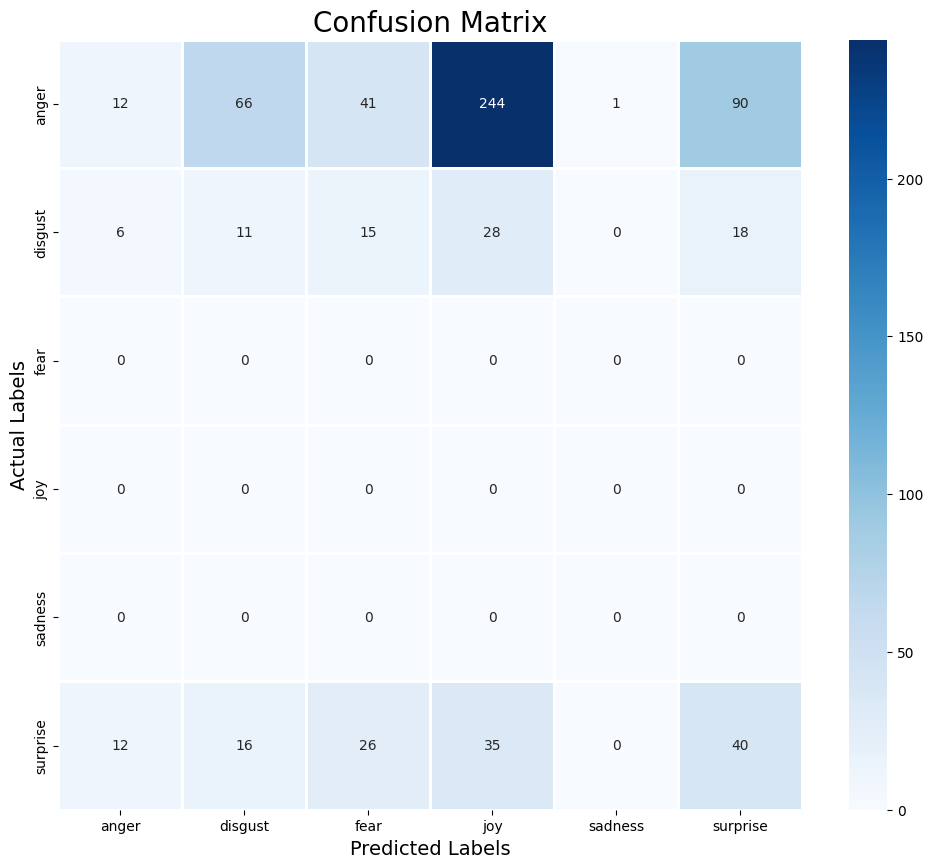

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.03      0.05       454
     disgust       0.12      0.14      0.13        78
        fear       0.00      0.00      0.00         0
         joy       0.00      0.00      0.00         0
     sadness       0.00      0.00      0.00         0
    surprise       0.27      0.31      0.29       129

    accuracy                           0.10       661
   macro avg       0.13      0.08      0.08       661
weighted avg       0.34      0.10      0.11       661



C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
